In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Wykres radarowy

(<a list of 10 Line2D ticklines objects>,
 [Text(0.0, 0, 'Siła'),
  Text(1.2566370614359172, 0, 'Wytrzymałość'),
  Text(2.5132741228718345, 0, 'Zręczność'),
  Text(3.7699111843077517, 0, 'Inteligencja'),
  Text(5.026548245743669, 0, 'Szybkość')])

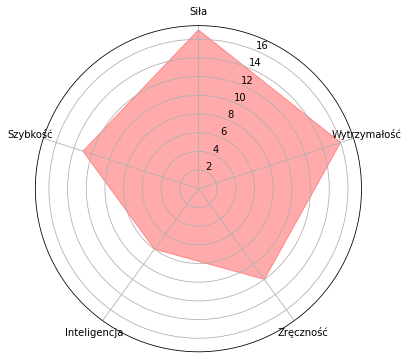

In [5]:
# przykład wykresu radarowego (w Internecie można spotkać jeszcze kilka innych określeń: biegunowego, pająkowego, gwiezdnego)

# dane
etykiety = ['Siła', 'Wytrzymałość', 'Zręczność', 'Inteligencja', 'Szybkość']
dane = [17, 16, 12, 8, 13]

# generowanie ilości osi i ich położenia na wykresie
angles = np.linspace(0, 2 * np.pi, len(etykiety), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# wypełnienie obszarów
ax.fill(angles, dane, color='red', alpha=0.33)
# rysowanie linii na krawędziach obszaru - opcjonalne
# ax.plot(angles, dane, color='red', linewidth=1)

# ustawienie osi, tak aby rozpoczynały się od "godziny 12"
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# rysowanie linii osi dla
ax.set_thetagrids(np.degrees(angles), etykiety)

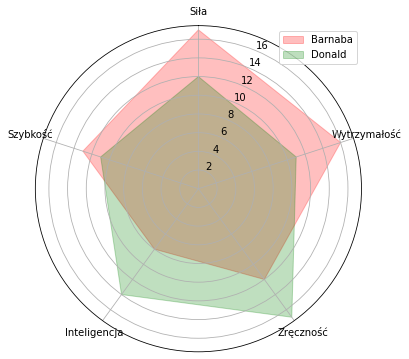

In [6]:
# przykład wyświetlenia wielu serii na jednym wykresie
# dane
etykiety = ['Siła', 'Wytrzymałość', 'Zręczność', 'Inteligencja', 'Szybkość']
dane = [[17, 16, 12, 8, 13], [12, 11, 17, 14, 11]]

# generowanie ilości osi i ich położenia na wykresie
angles = np.linspace(0, 2 * np.pi, len(etykiety), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# wypełnienie obszarów
ax.fill(angles, dane[0], color='red', alpha=0.25, label='Barnaba')
ax.fill(angles, dane[1], color='green', alpha=0.25, label='Donald')
# rysowanie linii na krawędziach obszaru - opcjonalne
# ax.plot(angles, dane, color='red', linewidth=1)

# ustawienie osi, tak aby rozpoczynały się od "godziny 12"
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# rysowanie linii osi dla
ax.set_thetagrids(np.degrees(angles), etykiety)
plt.legend()

**Zadanie1**

Bazując na powyższych przykładach wykresu radarowego napisz funkcję, która będzie w stanie wyświetlić podobny wykres dla danych ze zbioru [FIFA22_official_data.csv](./data/FIFA22_official_data.csv). Założenia:
* Funkcja przyjmuje jako wektor pandas DataFrame, w którym pierwsza kolumna to nazwa piłkarza a kolejne kolumny to dowolny podzbiór cech piłkarskich tego zawodnika (od Crossing do GKReflexes).
* Funkcja i wykres powinny działać dla zmiennej liczby cech oraz dla zmiennej liczby piłkarzy
* Ustaw stały zakres wartości cech w przedziale [0, 100]
* Etykiety osi na wykresie to etykiety kolumn poza nazwą piłkarza,
* Każdy piłkarz reprezentowany jest przez inny kolor
* Legenda zawiera również nazwisko piłkarza
* Rozwiązanie powinni zostać zapisane w formie notebooka.


# Wykresy animowane z wykorzystaniem matplotlib

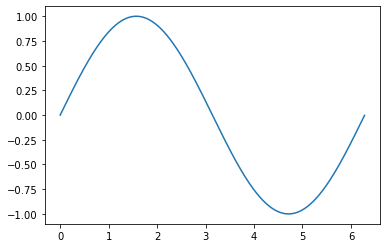

In [7]:
# przykład animacji wykresu pochodzący z oficjalnej dokumentacji
# https://matplotlib.org/stable/gallery/animation/simple_anim.html#sphx-glr-gallery-animation-simple-anim-py
# aby animacja zadziałała, skrypt należy uruchomić z poziomu terminala
# gotowy skrypt znajduje się w pliku test.py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

**Zadanie2**

Korzystając ze zbioru danych [pkn.txt](./data/pkn.txt), przygotuj skrypt, który będzie wyświetlał animację wykresu odzwierciedlającą cenę zamknięcia tego waloru. Na osi y powinna znajdować się cena a na osi x kolejny odczyt tej ceny. Przy pierwszym wyświetleniu wykresu pobierz pierwsze 20 wartości, a następnie przy każdej animacji agreguj kolejny odczyt. W miarę możliwości ustaw takie parametry wykresu, aby linia wykresu nie znajdowała się bezpośrednio przy górnej lub prawej krawędzi płótna.

**Dodatkowym bonusem będzie umieszczenie na osi x dat odczytu, tak aby przy aktualizacji wykresu aktualizował się również zakres dat.**

### Zadanie 1

In [28]:
fifa22 = pd.read_csv('data/FIFA22_official_data.csv')
fifa22[fifa22['Name'] == 'Cristiano Ronaldo'].iloc[:1, 27:61]

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
36,87.0,95.0,90.0,80.0,86.0,88.0,81.0,84.0,77.0,88.0,...,88.0,95.0,NaN,32.0,24.0,7.0,11.0,15.0,14.0,11.0


### Zadanie 2